Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
#load data set
df=pd.read_csv('./bank-full.csv',encoding='utf-8',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
subscribed_deposit    0
dtype: int64

In [16]:
#cheak duplicates
df.duplicated().sum()

0

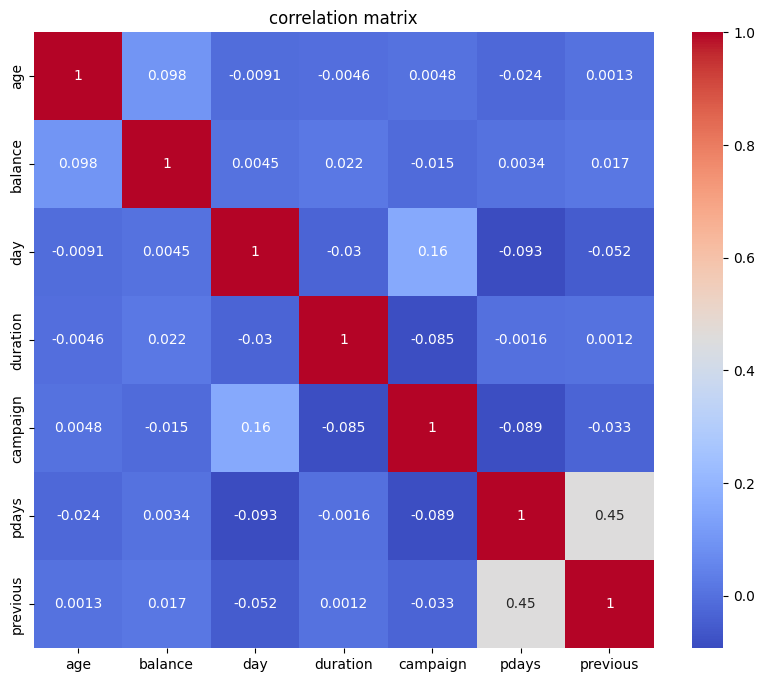

In [17]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [18]:
df1=df.copy()
df1.shape

(45211, 17)

In [19]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df1.apply(LabelEncoder().fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_deposit
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [20]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    88.30152
1    11.69848
Name: proportion, dtype: float64

In [22]:

## independent variables
x = df_encoded.iloc[:,:-1]   
print(x.shape)
## Target variable
y = df_encoded.iloc[:,-1] 
print(y.shape)

(45211, 16)
(45211,)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [24]:
dc=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [28]:
#train and test accuracy
print('train accuracy:',dc.score(x_train,y_train))
print('test accuracy:',dc.score(x_test,y_test))

train accuracy: 0.8991650077416501
test accuracy: 0.8938405396439235


In [29]:
y_pred=dc.predict(x_test)

In [30]:
#prediction accuracy
print(accuracy_score(y_test,y_pred))

0.8938405396439235


In [31]:
print(confusion_matrix(y_test,y_pred))

[[7699  294]
 [ 666  384]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7993
           1       0.57      0.37      0.44      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



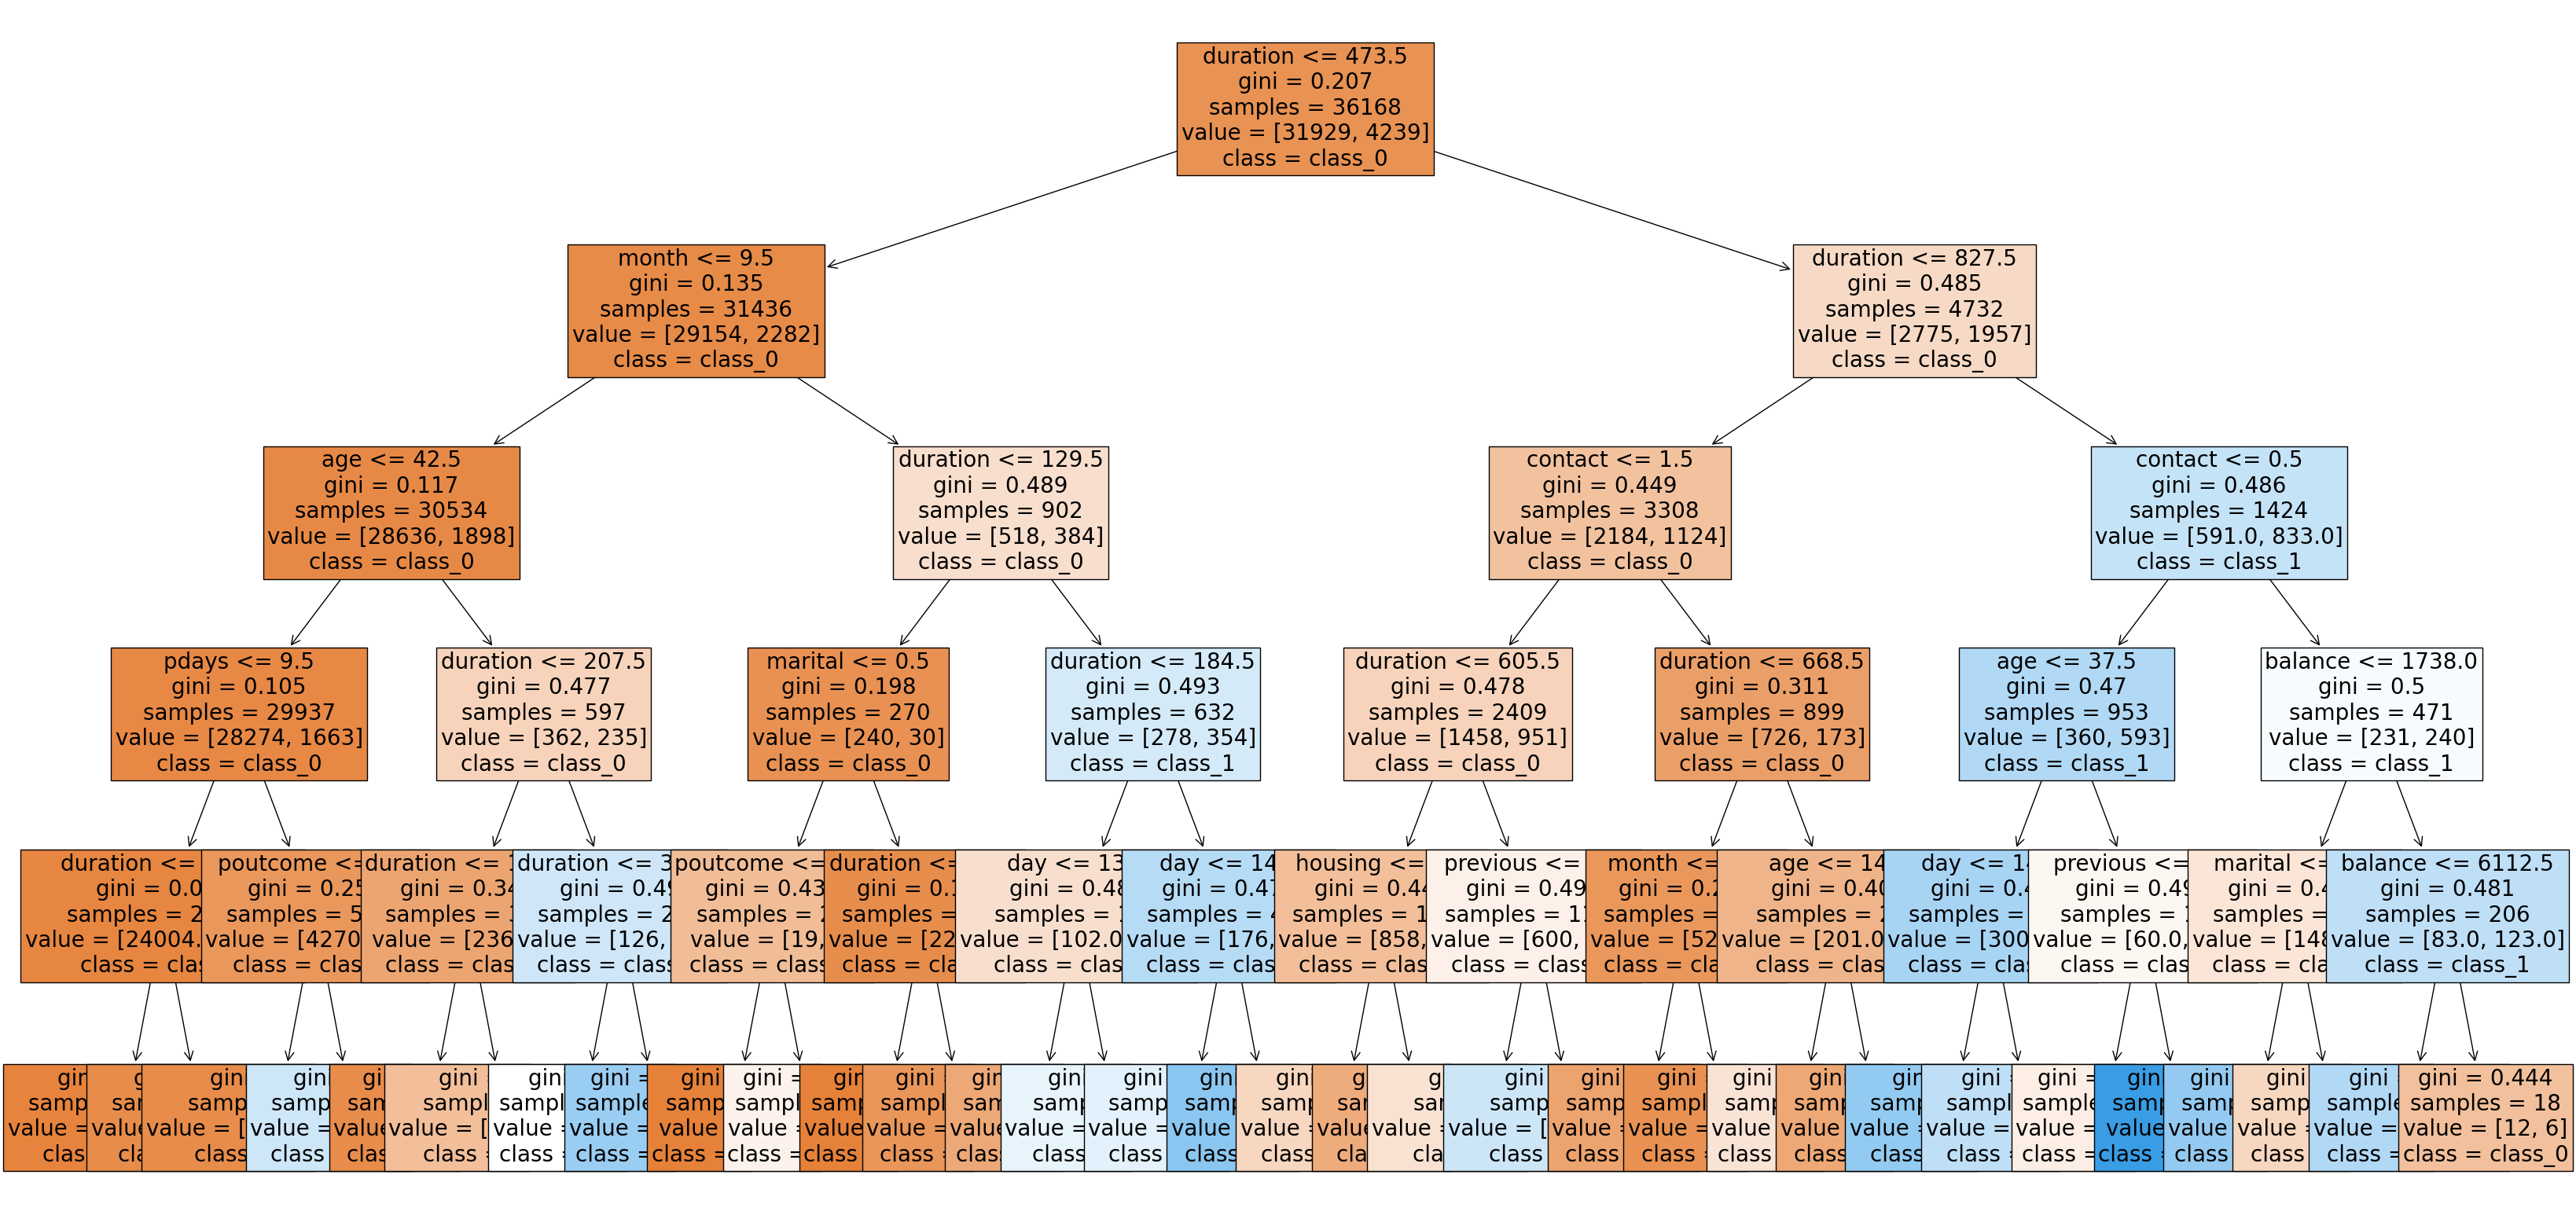

In [48]:
#plot decission tree
figure_name=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=figure_name, class_names=class_names, filled=True,fontsize=20)
plt.show()

decission tree classifier using entropy

In [36]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)
print("Training accuracy:",dc1.score(x_train,y_train))
print("Test accuracy:",dc1.score(x_test,y_test))


Training accuracy: 0.8957365627073657
Test accuracy: 0.8904124737365918


In [40]:
y1_pred=dc1.predict(x_test)

In [43]:
#accuracy score
print(accuracy_score(y_test,y1_pred))

0.8904124737365918


In [44]:
print(confusion_matrix(y_test,y1_pred))

[[7809  184]
 [ 807  243]]


In [46]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7993
           1       0.57      0.23      0.33      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



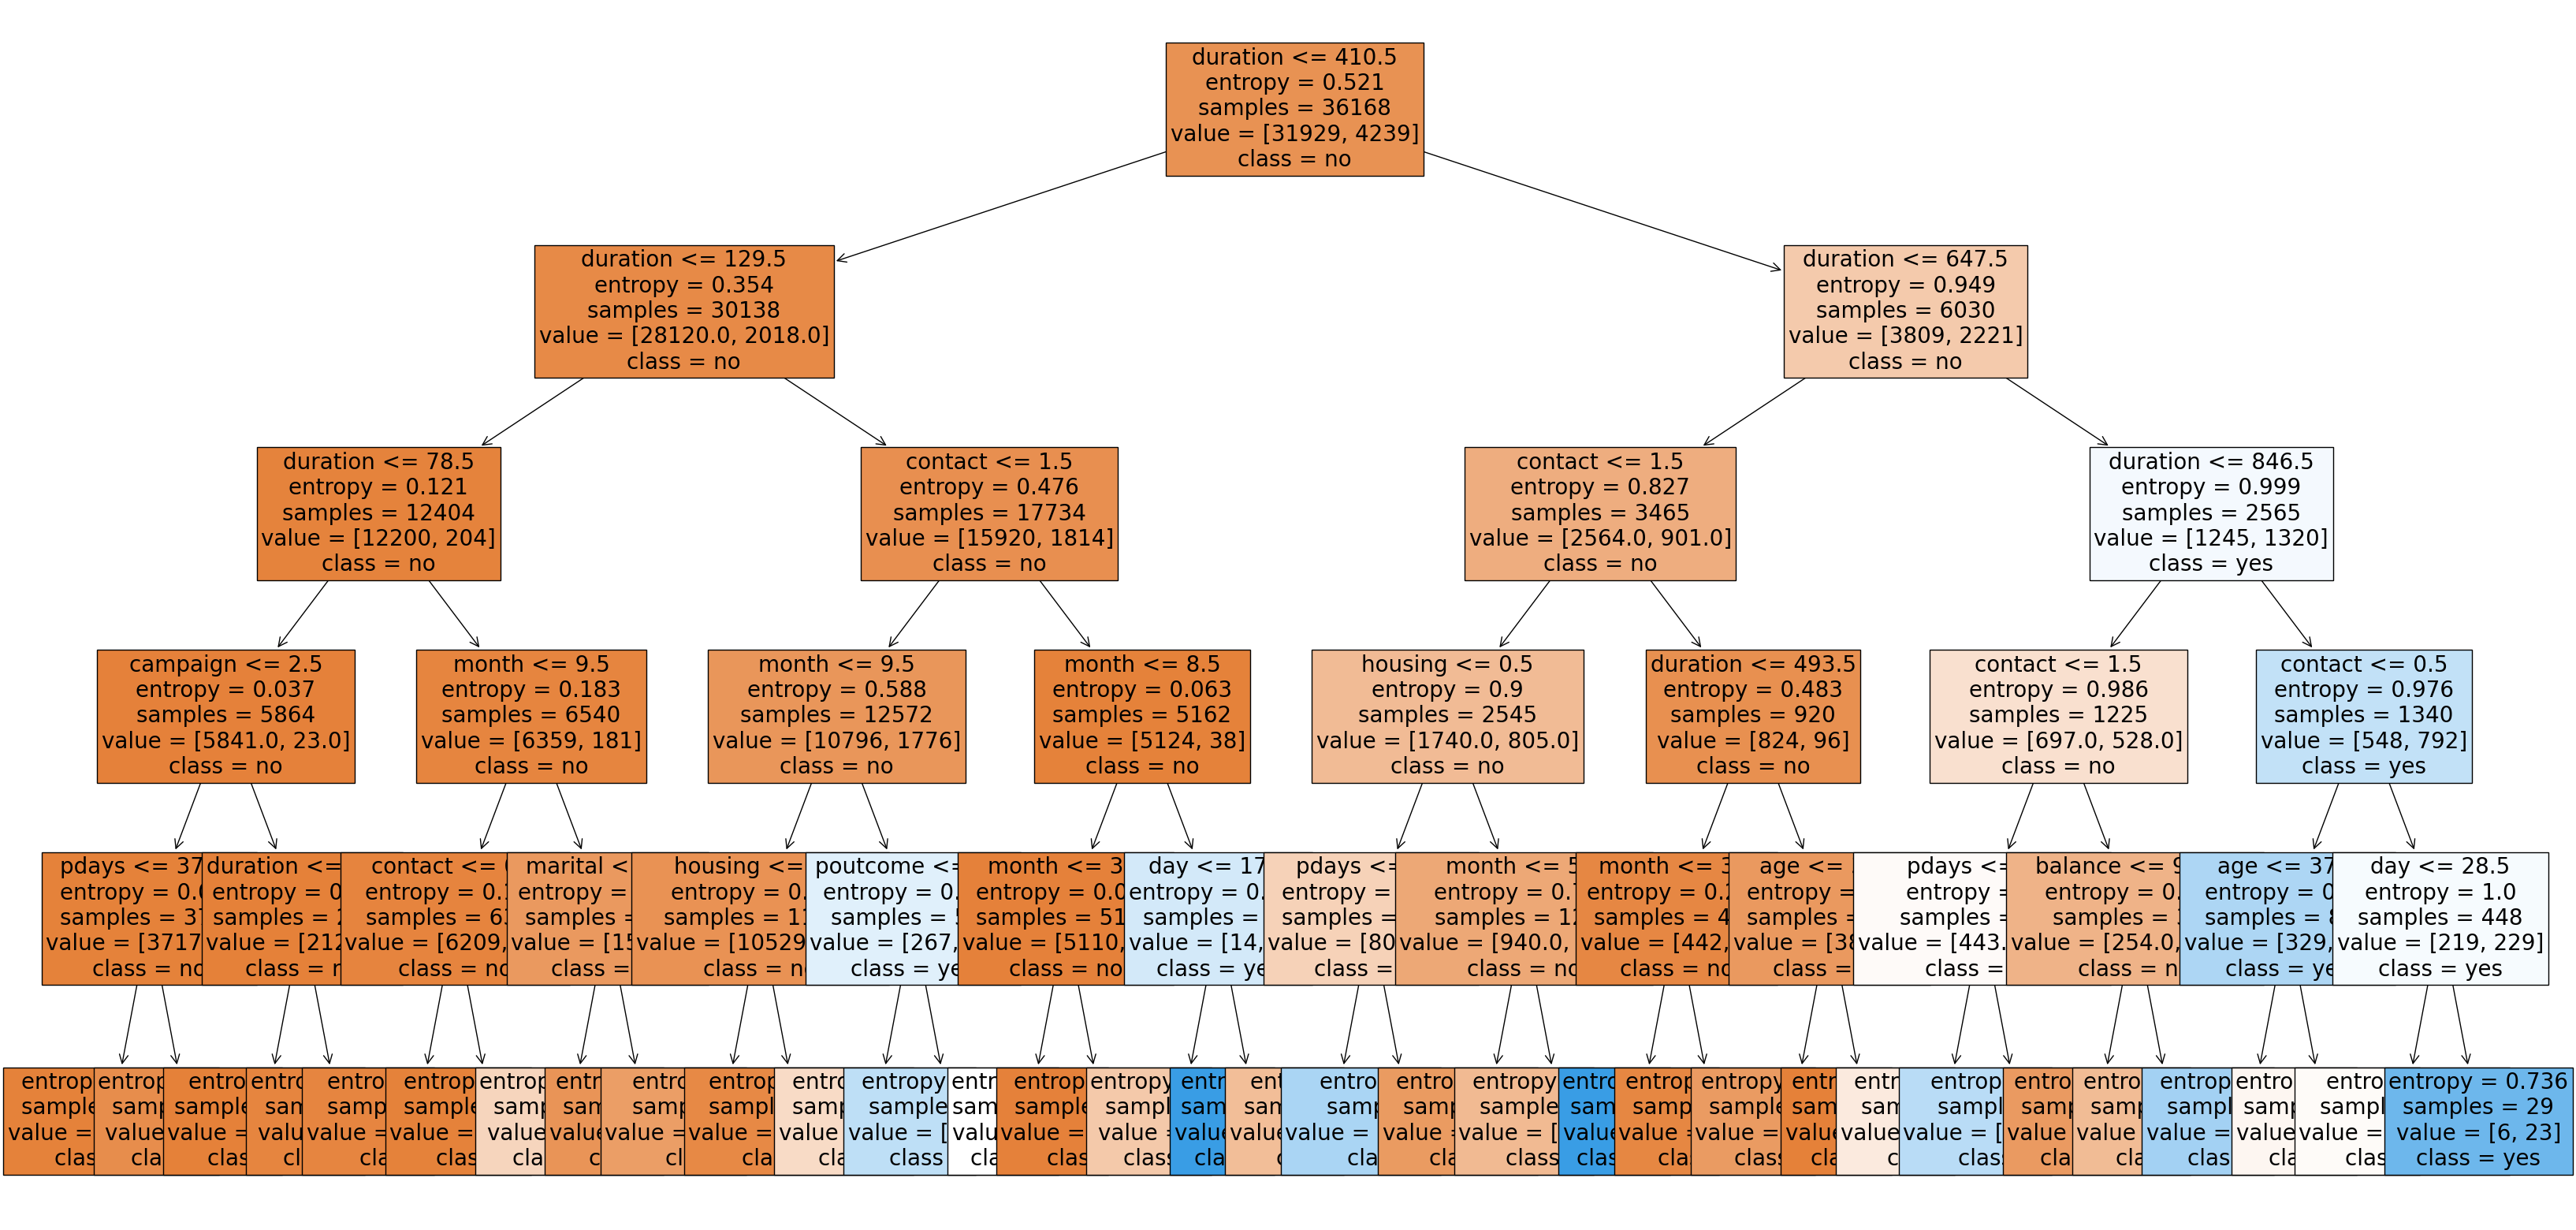

In [49]:
cln=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1,feature_names=fn.tolist(),class_names=cln,filled=True,fontsize=20)
plt.show()